### data loading

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
import torchvision.transforms as transforms

In [2]:
my_transforms = transforms.ToTensor()

train_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=True, transform=my_transforms)
test_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=False, transform=my_transforms)

In [3]:
batch_size = 32

train_dataloader = data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=32, num_workers=4)
test_dataloader = data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=32, num_workers=4)

In [4]:
def get_fashion_mnist_labels(labels):
    label_encoded = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    label_texts = []
    for label in labels:
        label_texts.append(label_encoded[label])
    
    return label_texts

torch.Size([1, 28, 28])
['dress']


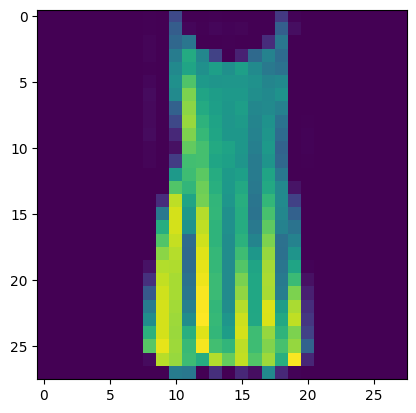

In [5]:

import matplotlib.pyplot as plt

for X,y in train_dataloader:
    print(X[0].shape)
    plt.imshow(X[0].permute(1,2,0))
    print(get_fashion_mnist_labels([y[0]]))
    break

In [6]:
def show_images (imgs,num_cols, num_rows, title=None, scale=0.5):
    figsize = (num_cols* scale, num_rows * scale)
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    for i in range(len(imgs)):
#         plt.figure(figsize=figsize)
        plt.subplot(num_cols, num_rows, i+1)
        plt.imshow(imgs[i].permute(1,2,0))
#         plt.text(0.5, -0.02,title[i],fontsize=9 )
        plt.title(title[i], fontsize=9)
        plt.axis('off')
        plt.grid(b=None)

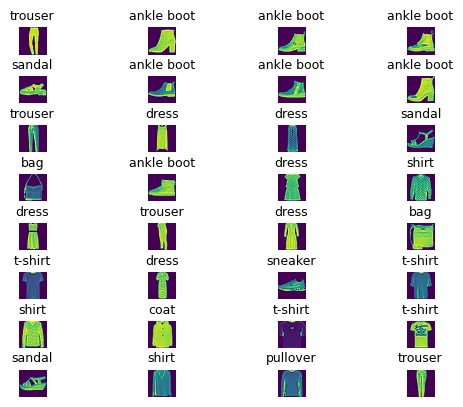

In [7]:
for X, y in train_dataloader:
    labels = get_fashion_mnist_labels(y)
    show_images(X,8,4, title=labels)
    break

### initialising model parameters

In [8]:
# each figure is 28 by 28 since we would be flattening it so the input size becomes 28 * 28
# the number of output would be in this case 10
# since we would have onlu one so w would be 784 * 10 and bias would be 1 * 10

W = torch.normal(0,1,size=(784,10), requires_grad=True)
# b = torch.normal(0,1,size=(1,10), requires_grad=True)


In [9]:
b = torch.zeros(10, requires_grad=True)

In [10]:
# defining softmax

def softmax(X):
    numerator = torch.exp(X)
    denominator = numerator.sum(1, keepdims=True)
    return numerator/denominator

In [11]:
X = torch.normal(0,1,size=(3,2))
print("Before softmax: ")
print(X)
print(X.sum(dim=1)) # the sum not equal to 1
print("\nAfter softmax: ")
print(softmax(X))
print(softmax(X).sum(dim=1)) # verified softmax is working as it should be

Before softmax: 
tensor([[ 0.9733,  0.9643],
        [ 0.5840,  0.2377],
        [-1.4072, -0.4264]])
tensor([ 1.9377,  0.8217, -1.8336])

After softmax: 
tensor([[0.5023, 0.4977],
        [0.5857, 0.4143],
        [0.2727, 0.7273]])
tensor([1., 1., 1.])


In [12]:
def softmax_regression_model(X):
    return softmax(torch.matmul(X.reshape(-1,W.shape[0]), W) + b)

In [13]:
# without training prediction
for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X[0])
        print(result.argmax(1))
    break

tensor([5])


In [14]:
# cross entropy is negative log of probabilities(taken from y_hat) of actual label (taken from y)
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])
    

In [15]:
# looking at loss

for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X)
        print(f"Output from softmax regression model for entire batch (y_hat) :\n\n{result}\n")
        loss = cross_entropy(result, y)
        print(f"The loss :\n\n{loss}\n")
        print(f"Argmax of result :\n\n{result.argmax(1)}\n")
        
    break

Output from softmax regression model for entire batch (y_hat) :

tensor([[8.0559e-19, 3.4406e-16, 9.9281e-01, 6.1631e-14, 1.0864e-07, 1.4809e-05,
         2.0336e-08, 2.0107e-25, 2.8417e-09, 7.1797e-03],
        [2.8714e-08, 1.4733e-13, 3.8137e-03, 1.9319e-16, 9.9590e-01, 3.7229e-11,
         2.9004e-04, 6.6724e-17, 2.6843e-08, 1.9919e-08],
        [9.5321e-17, 2.5744e-16, 9.7457e-01, 4.4399e-07, 2.3990e-02, 8.8441e-08,
         4.6710e-12, 4.4271e-16, 5.8203e-05, 1.3829e-03],
        [5.3639e-06, 8.6898e-09, 1.5209e-01, 1.6349e-14, 1.7060e-02, 8.3040e-01,
         2.9571e-04, 9.7083e-13, 8.1197e-07, 1.4437e-04],
        [1.3308e-02, 2.9434e-04, 5.4279e-03, 4.5703e-08, 6.1328e-01, 2.2136e-01,
         1.4600e-01, 3.1319e-04, 2.7028e-05, 6.1215e-08],
        [4.5163e-09, 2.1534e-10, 9.9920e-01, 2.0424e-17, 7.9517e-04, 2.6498e-10,
         3.7663e-07, 1.4637e-16, 3.2751e-10, 5.0526e-07],
        [2.6638e-07, 7.0602e-09, 9.9862e-01, 1.8512e-12, 1.3755e-03, 7.4814e-07,
         2.9455e-06,

In [16]:
def accuracy(y_hat, y):
#     print(y_hat.argmax(1))
    return (y_hat.argmax(1)==y).sum()

In [17]:
# looking at accuracy

for X,y in train_dataloader:
    with torch.no_grad():
        predictions = softmax_regression_model(X)
        acc = accuracy(predictions, y)
        print("Accuracy: \n", acc/ len(y) )
        break

Accuracy: 
 tensor(0.1562)


In [18]:
# for the entire dataset evaluation of accuracy

def evaluate_accuracy(net, data_iter):
    tot_acc=0
    tot_number=0
    with torch.no_grad():
        for X, y in data_iter:
            predictions = net(X)
            tot_acc += int(accuracy(predictions, y))
            tot_number += len(y)
    return tot_acc/tot_number
            
        

In [19]:
evaluate_accuracy(softmax_regression_model, train_dataloader)

0.0624

In [20]:
def sgd(params=[W,b], lr=0.1, batch_size=batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr /batch_size
            param.grad.zero_()
        

In [21]:
W, b, W.shape, b.shape, W.grad, b.grad # initial Weight values

(tensor([[-0.1943,  0.6614,  0.4397,  ...,  1.7872, -1.8881,  1.2371],
         [ 1.0763,  0.5258,  0.6758,  ..., -0.6278, -0.6024,  0.0956],
         [-0.1897,  1.5346, -0.1356,  ...,  0.1811, -0.1330, -0.1002],
         ...,
         [ 1.7147, -1.2208, -2.3266,  ..., -0.4342, -2.4072, -0.2982],
         [-1.0554,  0.2131,  0.9972,  ..., -0.3307,  1.5499, -0.9185],
         [-0.6631,  1.1154,  0.4915,  ...,  1.5988,  0.4138,  0.2978]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True),
 torch.Size([784, 10]),
 torch.Size([10]),
 None,
 None)

In [22]:
def train_epoch_ch3(net, train_iter, loss, updater):
    training_loss = 0
    training_len = 0
    training_acc = 0
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater()
        training_len += len(y)
        training_loss += l.sum()
        training_acc += accuracy(y_hat, y)
    
    avg_loss = training_loss/training_len
    avg_acc = training_acc/training_len
    print(f"> average training acc: {avg_acc}")
    print(f"> average training loss: {avg_loss}")
    return avg_loss, avg_acc
        

In [23]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    train_loss_array = []
    train_acc_array = []
    test_acc_array = []
    for epoch in range(num_epochs):
        print(f"\nEpoch: {epoch}")
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        train_loss, train_acc = train_metrics
        test_acc = evaluate_accuracy(net, test_iter)
        print(f"> The test accuracy: {test_acc}")
        
        train_loss_array.append(train_loss.detach())
        train_acc_array.append(train_acc.detach())
        test_acc_array.append(test_acc)
        
    plt.plot(range(1,num_epochs+1), train_loss_array, '-g')
    plt.plot(range(1,num_epochs+1), train_acc_array, '-b')
    plt.plot(range(1,num_epochs+1), test_acc_array, '-r')
    plt.show()


Epoch: 0
> average training acc: 0.6764500141143799
> average training loss: 1.7137573957443237
> The test accuracy: 0.7472

Epoch: 1
> average training acc: 0.7678666710853577
> average training loss: 0.9827831387519836
> The test accuracy: 0.7708

Epoch: 2
> average training acc: 0.7875833511352539
> average training loss: 0.8436791300773621
> The test accuracy: 0.7676

Epoch: 3
> average training acc: 0.7986500263214111
> average training loss: 0.7640314698219299
> The test accuracy: 0.799

Epoch: 4
> average training acc: 0.8059499859809875
> average training loss: 0.7159776091575623
> The test accuracy: 0.7956

Epoch: 5
> average training acc: 0.8118166923522949
> average training loss: 0.6781044006347656
> The test accuracy: 0.8091

Epoch: 6
> average training acc: 0.8152499794960022
> average training loss: 0.6492489576339722
> The test accuracy: 0.8002

Epoch: 7
> average training acc: 0.8199666738510132
> average training loss: 0.6218624711036682
> The test accuracy: 0.7991



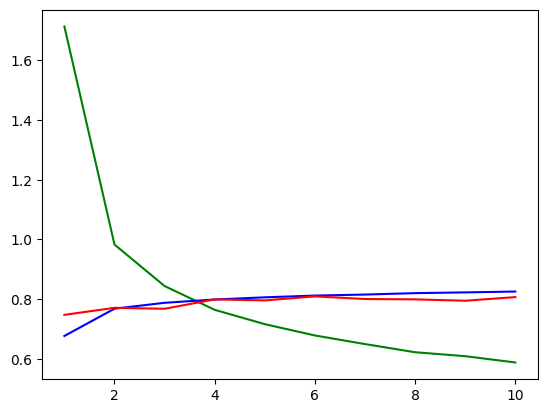

In [24]:
num_epochs = 10
train_ch3(softmax_regression_model, train_dataloader, test_dataloader, cross_entropy,num_epochs, sgd)